# Solution for problem2

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('data_final.xlsx')

# 1.Data understanding and exploration¶

In [3]:
df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [4]:
df.tail()

,observation,feature,price
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53
99,0.77,0.36,593.86


In [5]:
df.shape

(100, 3)

In [6]:
df.dtypes

observation    float64
feature        float64
price          float64
dtype: object

In [7]:
df.nunique().sort_values()

feature         61
observation     65
price          100
dtype: int64

# checking missing values 

In [8]:
df.isnull().sum()

observation    0
feature        0
price          0
dtype: int64

In [9]:
df.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


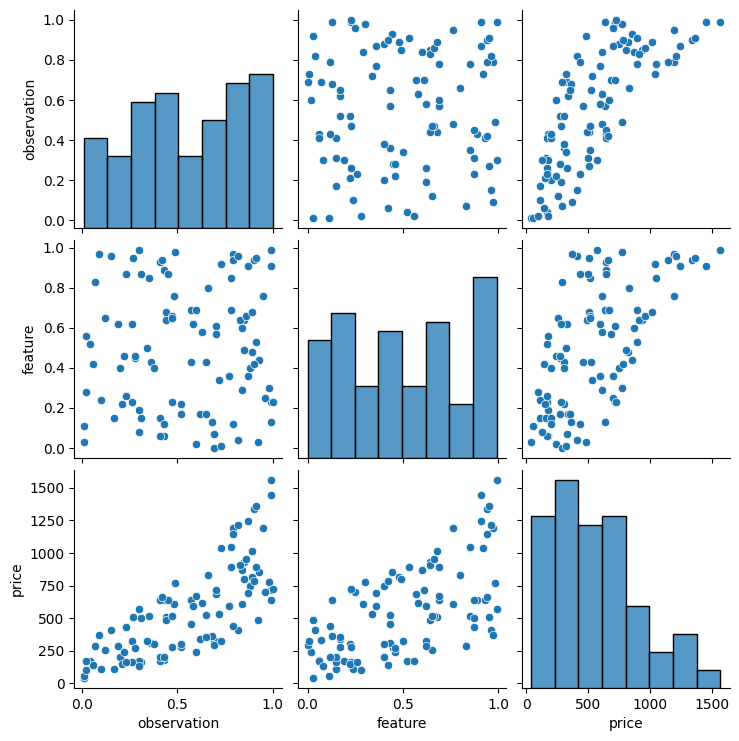

In [10]:
sns.pairplot(df)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc1=sc.fit_transform(df)
sc1

array([[-0.37726457,  0.5834713 , -0.1246473 ],
       [ 1.50392777, -0.88911471,  0.47135029],
       [ 0.99087531, -0.69276991,  0.15538128],
       [-0.92452053, -0.16918377, -0.82128965],
       [-1.64279397,  1.07433331, -0.76491932],
       [ 0.37521236,  0.97616091,  0.80051481],
       [ 0.61463684,  1.36885051,  1.40021641],
       [ 0.06738089, -0.23463204, -0.28655284],
       [-0.41146807,  1.27067811,  0.24873379],
       [-0.95872402,  1.46702291, -0.1248788 ],
       [-0.41146807, -1.44542499, -1.09147947],
       [ 1.0934858 ,  1.33612638,  1.99178655],
       [ 0.78565433,  0.61619544,  0.97564481],
       [ 1.19609629,  1.43429878,  2.27305944],
       [-0.47987506, -1.44542499, -1.11216981],
       [-0.1036366 , -1.08545952, -0.80493994],
       [-0.27465408,  0.51802304, -0.10644559],
       [ 0.34100887, -0.23463204, -0.09249769],
       [ 1.02507881,  0.45257477,  1.09382572],
       [ 1.29870678, -0.20190791,  0.8595474 ],
       [-0.47987506,  1.40157465,  0.248

<AxesSubplot: xlabel='observation', ylabel='price'>

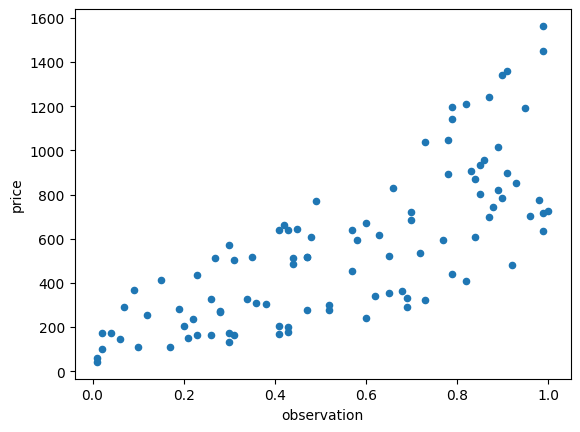

In [12]:
df.plot.scatter('observation','price')

<AxesSubplot: xlabel='feature', ylabel='price'>

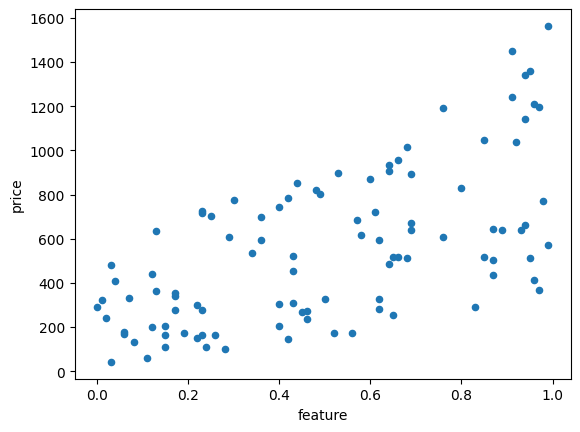

In [13]:
df.plot.scatter('feature','price')

# 2.Model building and evaluation

In [14]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [15]:
X

array([[0.44, 0.68],
       [0.99, 0.23],
       [0.84, 0.29],
       [0.28, 0.45],
       [0.07, 0.83],
       [0.66, 0.8 ],
       [0.73, 0.92],
       [0.57, 0.43],
       [0.43, 0.89],
       [0.27, 0.95],
       [0.43, 0.06],
       [0.87, 0.91],
       [0.78, 0.69],
       [0.9 , 0.94],
       [0.41, 0.06],
       [0.52, 0.17],
       [0.47, 0.66],
       [0.65, 0.43],
       [0.85, 0.64],
       [0.93, 0.44],
       [0.41, 0.93],
       [0.36, 0.43],
       [0.78, 0.85],
       [0.69, 0.07],
       [0.04, 0.52],
       [0.17, 0.15],
       [0.68, 0.13],
       [0.84, 0.6 ],
       [0.38, 0.4 ],
       [0.12, 0.65],
       [0.62, 0.17],
       [0.79, 0.97],
       [0.82, 0.04],
       [0.91, 0.53],
       [0.35, 0.85],
       [0.57, 0.69],
       [0.52, 0.22],
       [0.31, 0.15],
       [0.6 , 0.02],
       [0.99, 0.91],
       [0.48, 0.76],
       [0.3 , 0.19],
       [0.58, 0.62],
       [0.65, 0.17],
       [0.6 , 0.69],
       [0.95, 0.76],
       [0.47, 0.23],
       [0.15,

In [16]:
y

array([ 511.14,  717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,
        455.19,  640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,
        169.88,  276.05,  517.43,  522.25,  932.21,  851.25,  640.11,
        308.68, 1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,
        303.7 ,  256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,
        638.75,  301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,
        593.45,  355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,
        166.19,   58.62,  642.45,  368.14,  702.78,  615.74,  143.79,
        109.  ,  328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,
        202.01,  148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,
         98.47,  819.63,  174.44,  483.13,  534.24,  572.31,  957.61,
        518.29, 1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,
        292.23,  775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,
        771.11, 1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,
        434.53,  593

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

# Polynomial Regression Model

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
model1  = LinearRegression()
model1.fit(X_poly,y)

LinearRegression()

In [19]:
plt.scatter(X,y, color = 'red')
plt.plot(X,poly_reg.predict(X_poly, color = 'blue')

SyntaxError: incomplete input (3595033858.py, line 2)

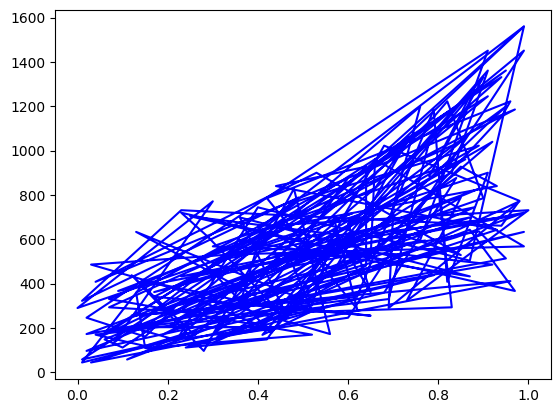

In [20]:
plt.plot(X,model1.predict(poly_reg.fit_transform(X)), color = 'blue')